In [25]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 6)

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    - Value 0: typical angina
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 
    - 0 = normal; 
    - 1 = fixed defect; 
    - 2 = reversable defectand the label
14. condition: 0 = no disease, 1 = disease


In [26]:
DATA_DIR = Path("../data")

In [27]:
df = pd.read_csv(DATA_DIR / "heart_cleveland_upload.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [63]:
CATEGORIAL_FEATURES = [
    "age", "sex", "fbs", "restecg", "exang", "slope", "ca", "thal", "condition"
]
NUM_FEATURES = [c for c in df.columns if c not in CATEGORIAL_FEATURES]

In [71]:
print(df.shape)
print("NaNs -", df.isna().sum().sum())
df.info()

(297, 14)
NaNs - 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


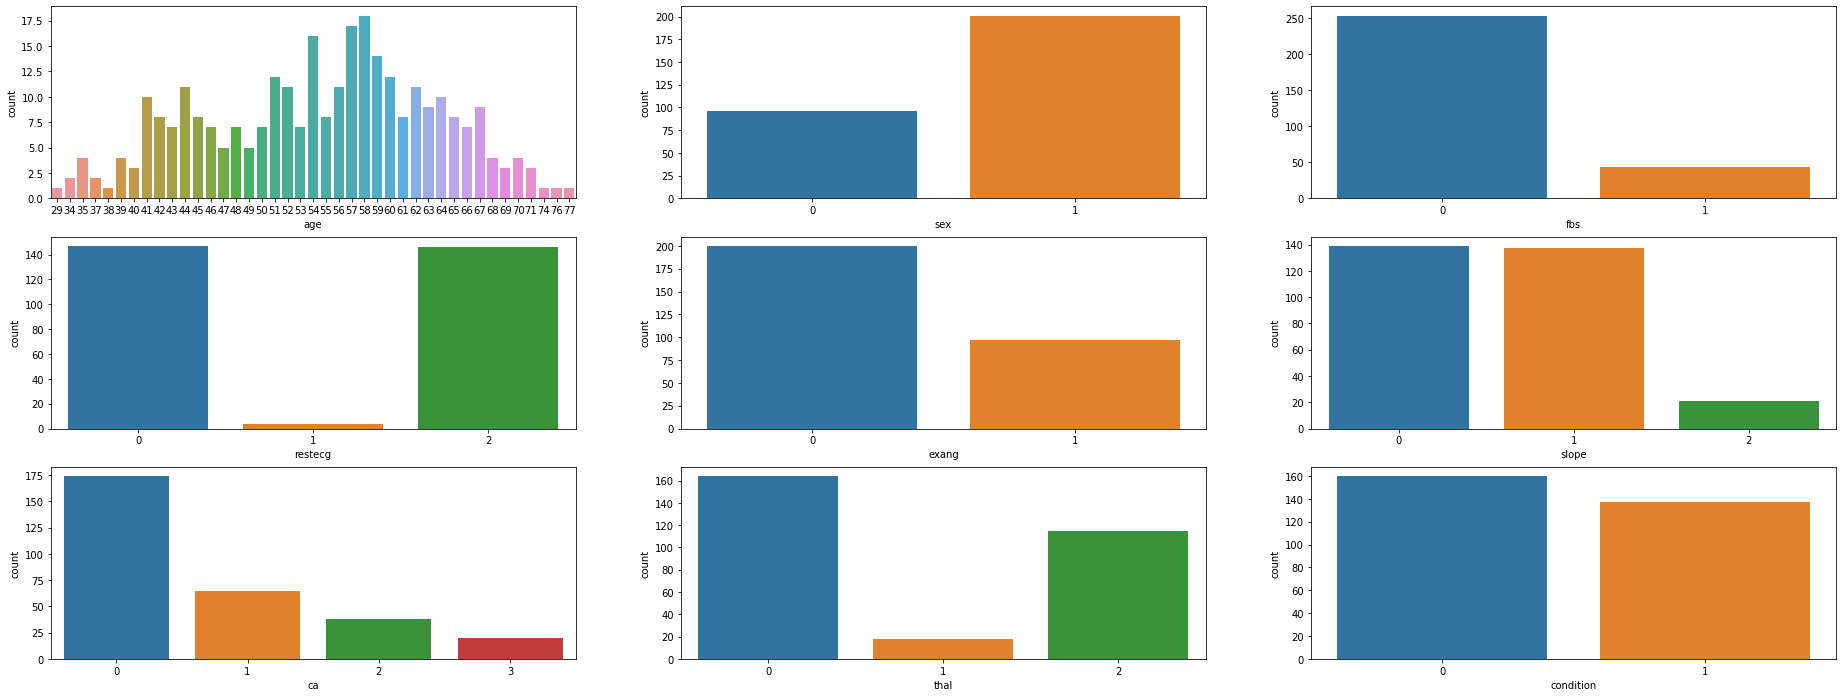

In [66]:
fig, axes = plt.subplots(3, 3, figsize=(32, 12)) 
 
c = 0
for i in range(3):
    for j in range(3):
        sns.countplot(ax=axes[i, j], data=df, x=CATEGORIAL_FEATURES[c])
        c += 1

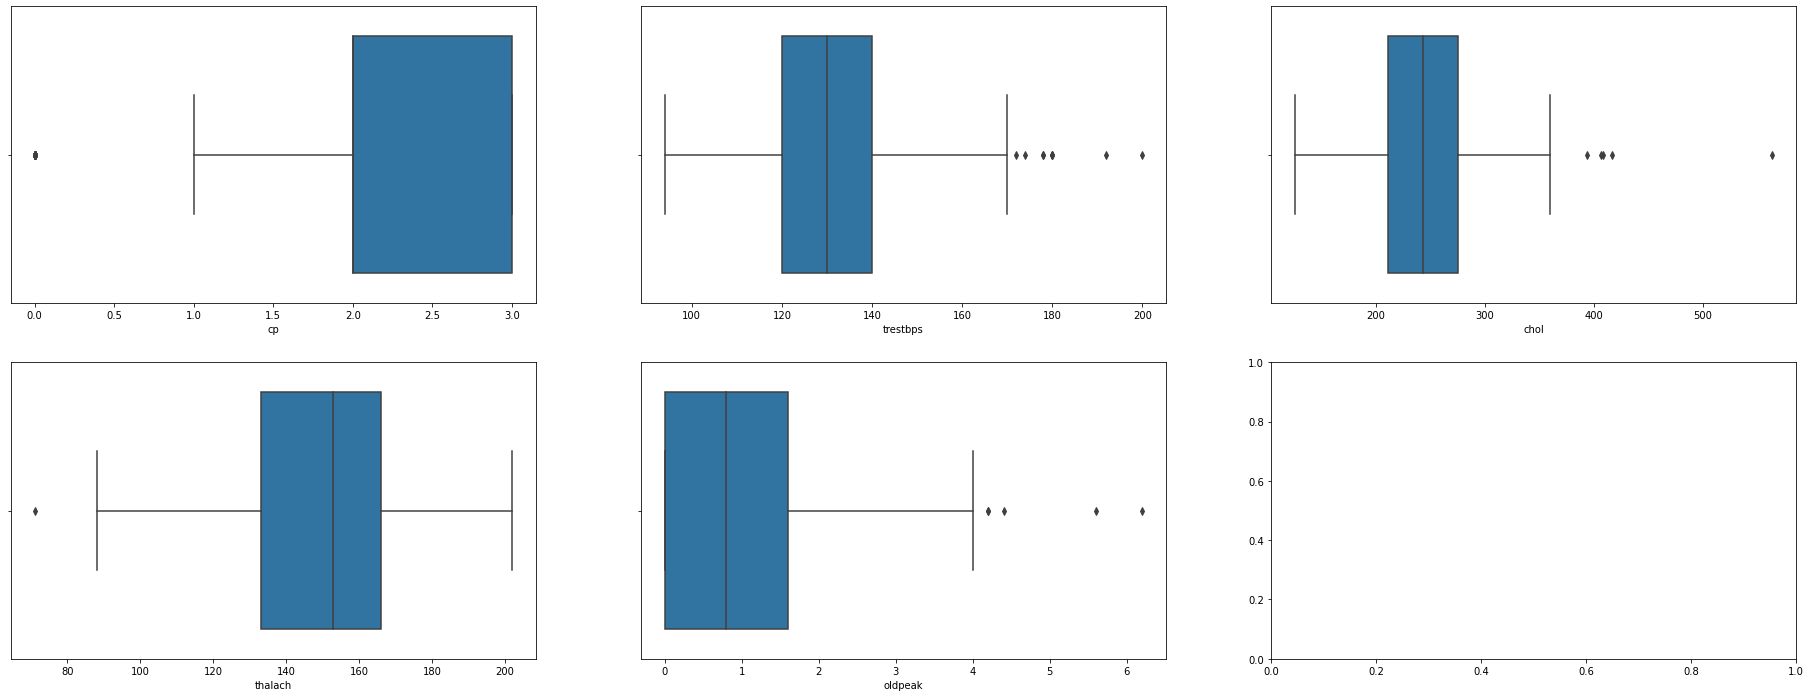

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(32, 12)) 
 
c = 0
for i in range(3):
    for j in range(3):
        if c < len(NUM_FEATURES):
            sns.boxplot(ax=axes[i, j], data=df, x=NUM_FEATURES[c])
            c += 1

# there are outliers so we can remove in data transformer fitting part

<AxesSubplot:>

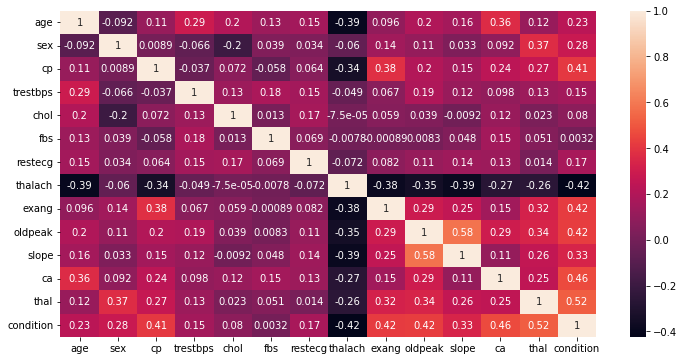

In [81]:
sns.heatmap(df.corr(), annot=True)

In [82]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


In [113]:
df_corr = df.corr()
ci = [
    [col1, col2]
    for col1 in df.columns
    for col2 in list(set(df_corr[df_corr[col1] > 0.35][col1].keys()) - set([col1]))
]
correlated_items = []
for c in ci:
    if c not in correlated_items and c[::-1] not in correlated_items:
        correlated_items.append(c)
correlated_items

[['age', 'ca'],
 ['sex', 'thal'],
 ['cp', 'condition'],
 ['cp', 'exang'],
 ['exang', 'condition'],
 ['oldpeak', 'condition'],
 ['oldpeak', 'slope'],
 ['ca', 'condition'],
 ['thal', 'condition']]